In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

# Mount Google Drive if the file is stored there (optional)
# from google.colab import drive
# drive.mount('/content/drive')

# Load the dataset
file_path = '/content/DoctorDatasetcsvfile.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

# Encode categorical variables if present
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Split into features (X) and target (y)
# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using Recursive Feature Elimination (RFE)
# Using a Random Forest Classifier as an estimator
estimator = RandomForestClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=5, step=1)  # Adjust n_features_to_select as needed
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[selector.support_]
print("\nSelected Features:")
print(selected_features)

# Save selected features to a CSV file
selected_features_df = pd.DataFrame({'Selected Features': selected_features})
selected_features_df.to_csv('/content/SelectedFeatures.csv', index=False)

# Optional: Evaluate the model with selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
estimator.fit(X_train_selected, y_train)
score = estimator.score(X_test_selected, y_test)
print("\nModel Accuracy with Selected Features:", score)


Dataset Head:
                         Doctor name              specialization  \
0  Dr. Kumuduni Amarasinghe Muthaliff     Addiction Professional   
1         Dr. Chathurika Weerasooriya  Anxiety reduction therapy   
2                  Dr. Nimal Liyanage      Applied Psychologist    
3                  Dr. Nimal Liyanage      Applied Psychologist    
4             Dr. Lasantha Wijesekara      Applied Psychologist    

                    Hospital       district   
0   Nawinna Medicare Hospital     Maharagama  
1  Blue cross medical Centre      Rajagiriya  
2           Medihelp Hospital  Mount Lavinia  
3           Winsetha Hospital     Colombo 10  
4           Winsetha Hospital     Colombo 10  

Missing Values:
Doctor name       0
specialization    0
Hospital          0
district          0
dtype: int64


<ipython-input-2-33dfb388ac56>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=5 > n_features=3. There will be no feature selection and all features will be kept.
  warnings.warn(



Selected Features:
Index(['Doctor name ', 'specialization', 'Hospital '], dtype='object')

Model Accuracy with Selected Features: 0.43333333333333335


Dataset Head:
                         Doctor name              specialization  \
0  Dr. Kumuduni Amarasinghe Muthaliff     Addiction Professional   
1         Dr. Chathurika Weerasooriya  Anxiety reduction therapy   
2                  Dr. Nimal Liyanage      Applied Psychologist    
3                  Dr. Nimal Liyanage      Applied Psychologist    
4             Dr. Lasantha Wijesekara      Applied Psychologist    

                    Hospital       district   
0   Nawinna Medicare Hospital     Maharagama  
1  Blue cross medical Centre      Rajagiriya  
2           Medihelp Hospital  Mount Lavinia  
3           Winsetha Hospital     Colombo 10  
4           Winsetha Hospital     Colombo 10  

Missing Values:
Doctor name       0
specialization    0
Hospital          0
district          0
dtype: int64

Explained Variance Ratio:
[0.43143086 0.3383037  0.23026544]


<ipython-input-3-266b1a47b2ed>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


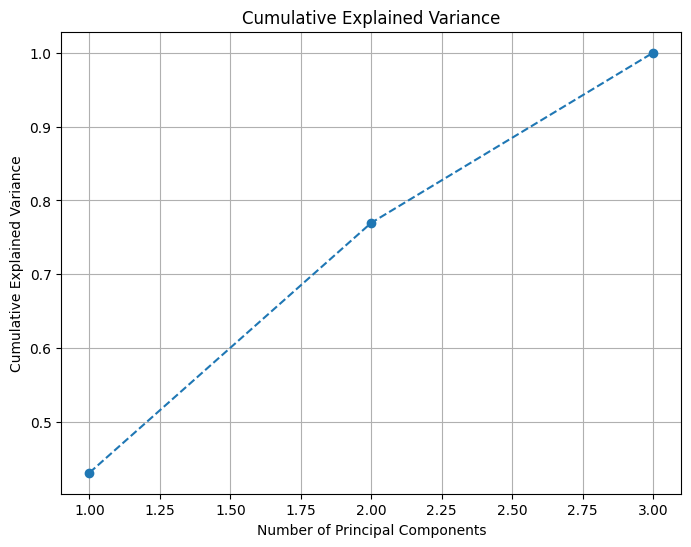


Number of components explaining 95% of variance: 3

PCA transformed data saved as 'PCA_Transformed_Data.csv'


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/DoctorDatasetcsvfile.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

# Encode categorical variables if present
from sklearn.preprocessing import LabelEncoder
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Separate features (X)
# Assuming the last column is the target variable
X = data.iloc[:, :-1]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Display explained variance for each component
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

# Plot cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Choose the number of components that explain a significant amount of variance (e.g., 95%)
n_components = (cumulative_variance >= 0.95).argmax() + 1
print(f"\nNumber of components explaining 95% of variance: {n_components}")

# Perform PCA with the chosen number of components
pca_selected = PCA(n_components=n_components)
X_pca_selected = pca_selected.fit_transform(X_scaled)

# Save the PCA-transformed data to a CSV file
pca_data = pd.DataFrame(X_pca_selected, columns=[f'PC{i+1}' for i in range(n_components)])
pca_data.to_csv('/content/PCA_Transformed_Data.csv', index=False)
print("\nPCA transformed data saved as 'PCA_Transformed_Data.csv'")


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and preprocess the dataset
file_path = '/content/DoctorDatasetcsvfile.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

# Encode categorical variables if present
from sklearn.preprocessing import LabelEncoder
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Separate features (X) and target (y)
# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Save the model if needed
import joblib
joblib.dump(model, '/content/logistic_regression_model.pkl')
print("\nModel saved as 'logistic_regression_model.pkl'")


Logistic Regression Accuracy: 0.17

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          11       0.08      0.14      0.10         7
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          17       0.33      0.25      0.29         4
          20       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         1
          32       0.15      0.50      0.24         4
          34       0.0

<ipython-input-4-fa3af9eedc18>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,